In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import config

In [47]:
df = pd.read_csv('wheat.csv', index_col=0)
print(df)

     year  month  day        tp           ssr        temp  wind_speed  \
0    2019     10   26  0.000000  1.420379e+07  284.484346  162.040869   
1    2019     10   27  0.000000  1.467194e+07  288.098321  171.394285   
2    2019     10   28  0.000005  1.492358e+07  288.252795   35.521060   
3    2019     10   29  0.000025  1.462464e+07  288.749056  157.330798   
4    2019     10   30  0.000009  1.406972e+07  291.663447  156.085723   
..    ...    ...  ...       ...           ...         ...         ...   
903  2023      6   12  0.003964  2.565640e+07  297.440198    3.352815   
904  2023      6   13  0.000615  2.463649e+07  299.490192   24.772569   
905  2023      6   14  0.000022  2.697523e+07  302.329135   55.170501   
906  2023      6   15  0.000012  2.800654e+07  304.989573   86.597659   
907  2023      6   16  0.000703  2.168589e+07  304.483343   68.426453   

     wind_direct   dvs  wlv   wst   wso   tagp   lai  
0     180.316255  0.00   94    10     0    105  0.19  
1     180.312

In [48]:
# 区分训练集和测试集
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str), format='%Y-%m-%d')
train = df[(df['date'] >= config.wheat_train_span[0][0]) &
                             (df['date'] <= config.wheat_train_span[-1][1])]
test = df[(df['date'] >= config.wheat_test_span[0][0]) &
                             (df['date'] <= config.wheat_test_span[-1][1])]
train = train.drop('date', axis=1)
test = test.drop('date', axis=1)

In [49]:
# 对train进行归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
print(train_scaled)
# 对test使用train的数据进行归一化
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns)
print(test_scaled)

         year     month       day        tp       ssr      temp  wind_speed  \
0   -1.818208  1.138399  1.187810 -0.242158 -0.129720  0.113986    1.114668   
1   -1.818208  1.138399  1.300646 -0.242158 -0.060899  0.515320    1.284054   
2   -1.818208  1.138399  1.413481 -0.242025 -0.023905  0.532475   -1.176550   
3   -1.818208  1.138399  1.526317 -0.241449 -0.067851  0.587585    1.029370   
4   -1.818208  1.138399  1.639152 -0.241892 -0.149429  0.911230    1.006823   
..        ...       ...       ...       ...       ...       ...         ...   
682  1.368295  0.117407 -0.391885 -0.241352  0.646899  1.707817    0.213083   
683  1.368295  0.117407 -0.279050  2.903678  0.960851  1.413723   -0.698576   
684  1.368295  0.117407 -0.166215 -0.072240  1.470889  1.387986   -1.417526   
685  1.368295  0.117407 -0.053379 -0.221671  1.588947  1.720532   -0.825131   
686  1.368295  0.117407  0.059456  1.858583  1.380154  2.037810   -0.747044   

     wind_direct       dvs       wlv       wst     

In [25]:
print(len(test_scaled))

221


In [8]:
# 将归一化模型导出
from joblib import dump
dump(scaler, 'wheat_scaler.joblib')

['wheat_scaler.joblib']

In [50]:
# train_wlv = train_scaled.drop(['dvs', 'wst', 'wso', 'tagp', 'lai'], axis=1)
rows1 = train_scaled[:len(train_scaled)-6].reset_index(drop=True)
rows2 = train_scaled[1:len(train_scaled)-5].reset_index(drop=True)
rows3 = train_scaled[2:len(train_scaled)-4].reset_index(drop=True)
rows4 = train_scaled[3:len(train_scaled)-3].reset_index(drop=True)
rows5 = train_scaled[4:len(train_scaled)-2].reset_index(drop=True)
rows6 = train_scaled[5:len(train_scaled)-1].reset_index(drop=True)
rows7 = train_scaled[6:].reset_index(drop=True)
# 将rows7的其他target删去
rows7 = rows7.drop(['dvs', 'wlv', 'wst', 'wso', 'tagp', 'lai'], axis=1)
# 进行拼接
train_input = pd.concat([rows1, rows2, rows3, rows4, rows5, rows6, rows7], axis=1, ignore_index=True)
print(train_input)

           0         1         2         3         4         5         6   \
0   -1.818208  1.138399  1.187810 -0.242158 -0.129720  0.113986  1.114668   
1   -1.818208  1.138399  1.300646 -0.242158 -0.060899  0.515320  1.284054   
2   -1.818208  1.138399  1.413481 -0.242025 -0.023905  0.532475 -1.176550   
3   -1.818208  1.138399  1.526317 -0.241449 -0.067851  0.587585  1.029370   
4   -1.818208  1.138399  1.639152 -0.241892 -0.149429  0.911230  1.006823   
..        ...       ...       ...       ...       ...       ...       ...   
676  1.368295  0.117407 -1.068898 -0.242158  1.567788  1.468807 -0.307025   
677  1.368295  0.117407 -0.956062 -0.242158  1.750149  1.530299 -0.373977   
678  1.368295  0.117407 -0.843227 -0.238513  1.612012  1.665472 -1.421274   
679  1.368295  0.117407 -0.730392 -0.169763  0.949350  1.835048 -1.250598   
680  1.368295  0.117407 -0.617556  0.340028 -0.313704  1.441301 -0.209372   

           7         8         9   ...        82        83        84  \
0  

In [51]:
# PCA分析
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=5)
train_pca = pca.fit_transform(train_input)

train_pca = pd.DataFrame(train_pca, columns=['A1', 'A2', 'A3', 'A4', 'A5'])
# 打印累计解释方差
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.40948054 0.1096219  0.06850208 0.04578342 0.04061535]


In [15]:
# 保存pca模型
from joblib import dump
dump(pca, 'wheat_pca.joblib')

['wheat_pca.joblib']

In [52]:
# 处理测试集
rows1 = test_scaled[:len(test_scaled)-6].reset_index(drop=True)
rows2 = test_scaled[1:len(test_scaled)-5].reset_index(drop=True)
rows3 = test_scaled[2:len(test_scaled)-4].reset_index(drop=True)
rows4 = test_scaled[3:len(test_scaled)-3].reset_index(drop=True)
rows5 = test_scaled[4:len(test_scaled)-2].reset_index(drop=True)
rows6 = test_scaled[5:len(test_scaled)-1].reset_index(drop=True)
rows7 = test_scaled[6:].reset_index(drop=True)
# 将rows7的其他target删去
rows7 = rows7.drop(['dvs', 'wlv', 'wst', 'wso', 'tagp', 'lai'], axis=1)
# 进行拼接
test_input = pd.concat([rows1, rows2, rows3, rows4, rows5, rows6, rows7], axis=1, ignore_index=True)
print(test_input)
# 使用训练集的PCA进行主成分分析
test_pca = pca.transform(test_input)
test_pca = pd.DataFrame(test_pca, columns=['A1', 'A2', 'A3', 'A4', 'A5']) 
print(test_pca)

           0         1         2         3         4         5         6   \
0    1.368295  1.393646 -0.843227 -0.219062 -0.391604  0.486805  0.004678   
1    1.368295  1.393646 -0.730392  0.212618 -1.170227  0.583842 -0.112390   
2    1.368295  1.393646 -0.617556 -0.117702 -1.063479  0.604120 -1.330949   
3    1.368295  1.393646 -0.504721  0.198078 -1.271002  0.730413 -0.414786   
4    1.368295  1.393646 -0.391885 -0.051063 -1.669590 -0.312116  1.493706   
..        ...       ...       ...       ...       ...       ...       ...   
210  2.430462  0.117407 -1.068898 -0.242105  1.758926  1.935177 -1.161065   
211  2.430462  0.117407 -0.956062 -0.077904  1.252743  2.065453 -0.386551   
212  2.430462  0.117407 -0.843227 -0.241879  2.012726  2.101780 -1.315747   
213  2.430462  0.117407 -0.730392 -0.162942  1.864531  2.160064 -0.981425   
214  2.430462  0.117407 -0.617556 -0.241321  1.790627  1.855784 -1.231361   

           7         8         9   ...        82        83        84  \
0  

### 对WLV进行分析

In [53]:
# 对target进行归一化
scaler_target = StandardScaler()
train_target = train['wlv'][6:].reset_index(drop=True).to_numpy()
train_target = train_target.reshape(-1, 1)
train_target_scaled = scaler_target.fit_transform(train_target)
test_target = test['wlv'][6:].reset_index(drop=True).to_numpy()
test_target = test_target.reshape(-1, 1)
test_target_scaled = scaler_target.transform(test_target)

In [54]:
print(train_target_scaled)
print(test_target_scaled)

[[-9.27797905e-01]
 [-9.19516239e-01]
 [-9.13074944e-01]
 [-9.07553833e-01]
 [-8.94671242e-01]
 [-8.81788650e-01]
 [-8.74427170e-01]
 [-8.64305134e-01]
 [-8.55103283e-01]
 [-8.44981247e-01]
 [-8.28417915e-01]
 [-8.09094028e-01]
 [-7.92530696e-01]
 [-7.73206809e-01]
 [-7.53882922e-01]
 [-7.32718665e-01]
 [-7.22596629e-01]
 [-7.12474593e-01]
 [-6.97751631e-01]
 [-6.89469965e-01]
 [-6.87629595e-01]
 [-6.81188299e-01]
 [-6.67385523e-01]
 [-6.55423117e-01]
 [-6.46221266e-01]
 [-6.39779970e-01]
 [-6.32418489e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.25977194e-01]
 [-6.2597719

### 多元回归分析

In [55]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target_scaled)

LinearRegression()

In [56]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [[ 0.12279131 -0.06025691 -0.23585896 -0.03933491 -0.06123288]]
Intercept: [-2.74205079e-17]


R-squared: 0.9665654413669835
MAE: 161.68320107261553
MSE: 47363.141342973206


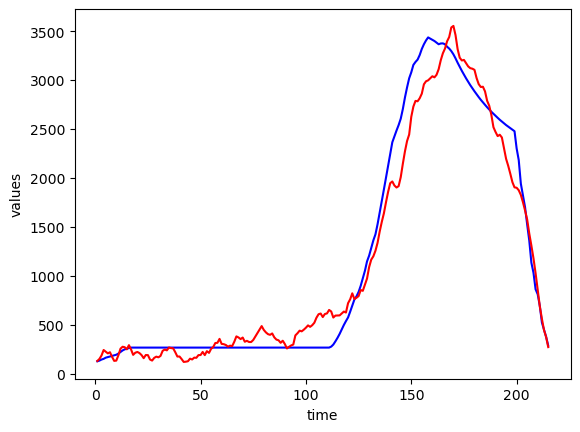

In [57]:
# 预测
predictions_scaled = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target_scaled)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 对数据进行反过归一化
predictions = scaler_target.inverse_transform(predictions_scaled)

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
n = len(test_target)
x = list(range(1, n+1))
plt.plot(x, test_target, color='blue')
plt.plot(x, predictions, color='red')
# plt.scatter(test_target, predictions)
plt.xlabel('time')
plt.ylabel('values')
# plt.title('Actual vs. Predicted Values')
plt.show()

### 支持向量回归分析

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target_scaled)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions_scaled = best_svr.predict(test_pca).reshape(-1,1)
predictions = scaler_target.inverse_transform(predictions_scaled)
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Best parameters: {'C': 0.1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 169.55380321963864
MSE of the best model: 46658.05670853262


f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

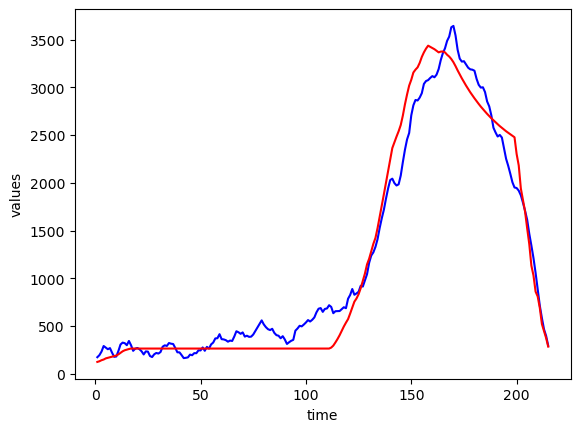

In [59]:
## 画图
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 随机森林回归

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target_scaled)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions_scaled = best_model.predict(test_input).reshape(-1, 1)

# 反归一化
predictions = scaler_target.inverse_transform(predictions_scaled)

mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
f:\mytools\python\envs\crop_study\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 300}
MAE of the best model: 57.18363624777703
MSE of the best model: 4248.085985604672


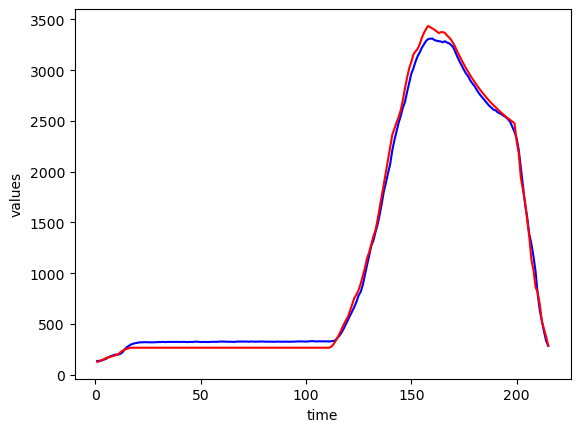

In [62]:
## 画图
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 保存三个机器学习模型

In [20]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'wlv_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'wlv_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'wlv_rfr.joblib')

['wlv_rfr.joblib']

## 对WST进行分析

In [100]:
from sklearn.preprocessing import StandardScaler
scaler_target = StandardScaler()
train_target = train['wst'][6:].reset_index(drop=True).to_numpy()
train_target_scaled = scaler_target.fit_transform(train_target.reshape(-1,1)).ravel()
test_target = test['wst'][6:].reset_index(drop=True).to_numpy()
test_target_scaled = scaler_target.transform(test_target.reshape(-1,1)).ravel()
print(test_target_scaled)

[-0.6590626  -0.65865241 -0.65783202 -0.65742183 -0.65660145 -0.65619126
 -0.65578107 -0.65537088 -0.65496069 -0.6545505  -0.65331992 -0.65208935
 -0.65085878 -0.65003839 -0.64921801 -0.64880782 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0.64839763
 -0.64839763 -0.64839763 -0.64839763 -0.64839763 -0

### 多元回归分析

In [101]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target_scaled)

LinearRegression()

In [102]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.15196512  0.0192824  -0.07470686 -0.00581907 -0.00829465]
Intercept: -8.775194764479327e-17


R-squared: -0.4757056483643465
MAE: 629.5882857395619
MSE: 518927.84638368286


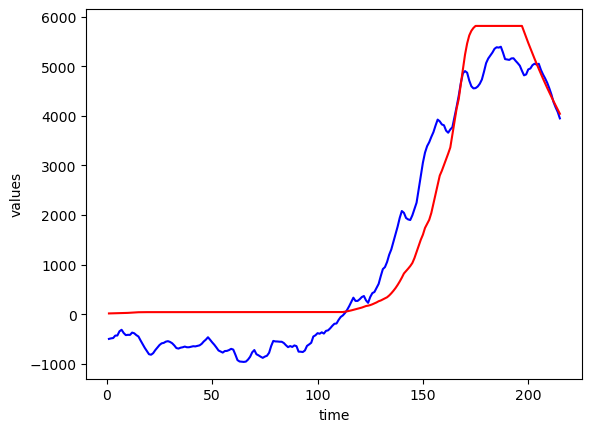

In [104]:
# 预测
predictions_scaled = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 支持向量回归分析

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target_scaled)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions_scaled = best_svr.predict(test_pca)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
MAE of the best model: 586.339973299652
MSE of the best model: 520376.7225320415


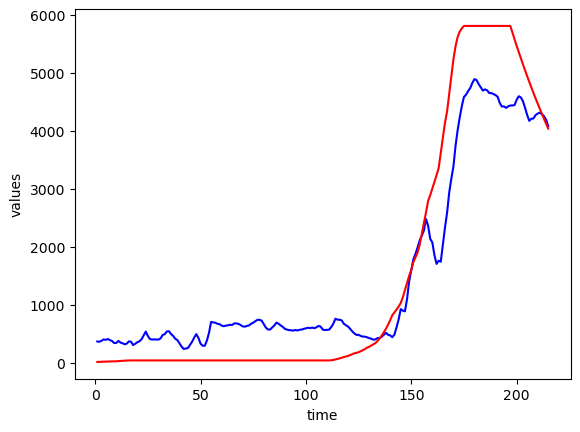

In [106]:
# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 随机森林回归分析

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target_scaled)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions_scaled = best_model.predict(test_input)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 300}
MAE of the best model: 51.888642010223585
MSE of the best model: 11704.87925556156


### 保存三个机器学习模型

In [29]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'wst_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'wst_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'wst_rfr.joblib')

['wst_rfr.joblib']

## 对WSO进行分析

In [108]:
from sklearn.preprocessing import StandardScaler
scaler_target = StandardScaler()
train_target = train['wso'][6:].reset_index(drop=True).to_numpy()
train_target_scaled = scaler_target.fit_transform(train_target.reshape(-1,1)).ravel()
test_target = test['wso'][6:].reset_index(drop=True).to_numpy()
test_target_scaled = scaler_target.transform(test_target.reshape(-1,1)).ravel()
print(test_target)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   13   69  179  472  831 1194 1520 1781 2086 2430 2773
 3039 3224 3311 3486 3741 4061 4167 4307 4647 4962 5233 5368 5530 5648
 5779 

### 多元回归分析

In [109]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target_scaled)

LinearRegression()

In [110]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [0.1270791  0.0694223  0.1680685  0.06405171 0.05514951]
Intercept: 8.7996478482892e-17


R-squared: -0.1943994606822892
MAE: 334.4431755307171
MSE: 203282.31307583887


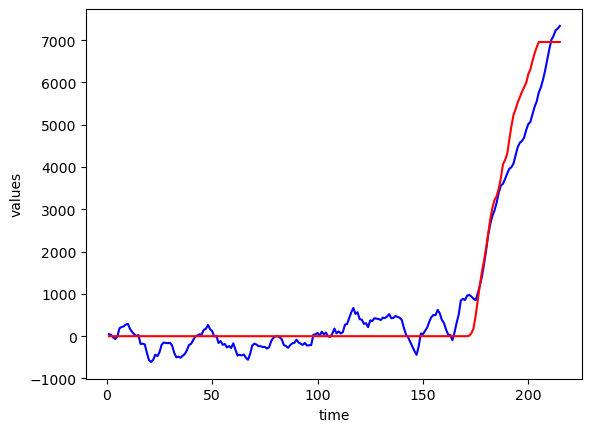

In [111]:
# 预测
predictions_scaled = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 支持向量回归分析

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target_scaled)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions_scaled = best_svr.predict(test_pca)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
MAE of the best model: 309.469063929651
MSE of the best model: 160781.9649931878


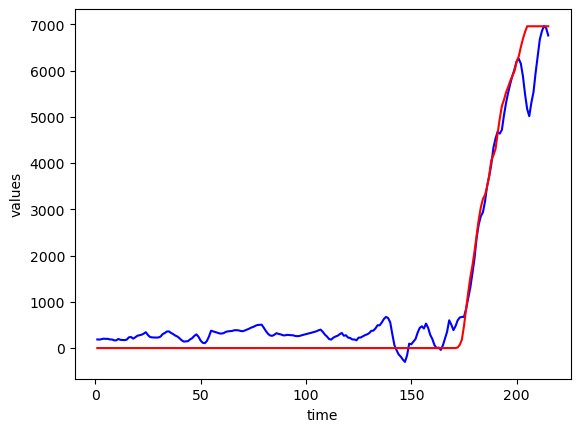

In [113]:
# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 随机森林回归分析

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target_scaled)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions_scaled = best_model.predict(test_input)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 300}
MAE of the best model: 39.313716672362155
MSE of the best model: 19516.51783082815


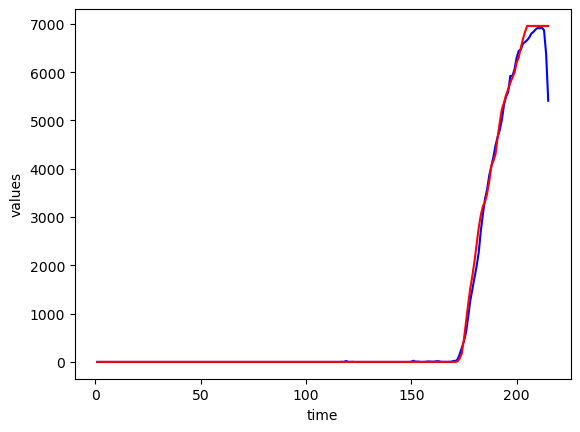

In [115]:
# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 保存三个机器学习模型

In [36]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'wso_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'wso_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'wso_rfr.joblib')

['wso_rfr.joblib']

## 对DVS进行分析

In [116]:
scaler_target = StandardScaler()
train_target = train['dvs'][6:].reset_index(drop=True).to_numpy()
train_target_scaled = scaler_target.fit_transform(train_target.reshape(-1,1)).ravel()
test_target = test['dvs'][6:].reset_index(drop=True).to_numpy()
test_target_scaled = scaler_target.transform(test_target.reshape(-1,1)).ravel()

### 多元回归分析

In [117]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target_scaled)

LinearRegression()

In [118]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [0.15208513 0.00484299 0.03274595 0.01339412 0.04075934]
Intercept: 1.8241643723437317e-17


R-squared: 0.9575716210678178
MAE: 0.07104417472001114
MSE: 0.011010099256166478


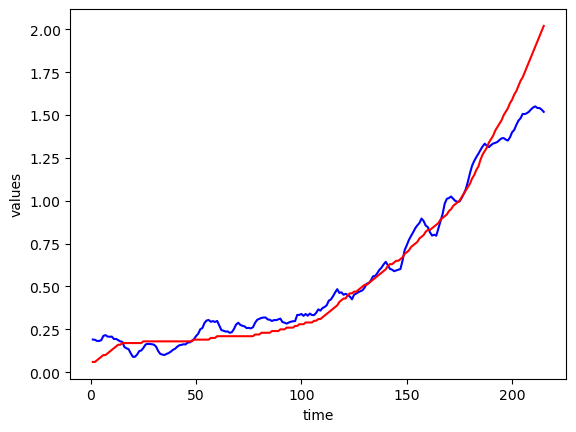

In [119]:
# 预测
predictions_scaled = model.predict(test_pca)

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()

# 计算R平方
from sklearn.metrics import r2_score
r_squared = r2_score(test_target, predictions)
print(f'R-squared: {r_squared}')

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
# plt.title('Actual vs. Predicted Values')
plt.show() 

### 支持向量回归分析

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target_scaled)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions_scaled = best_svr.predict(test_pca)

predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()

mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 0.06163434591268726
MSE of the best model: 0.007612750889943157


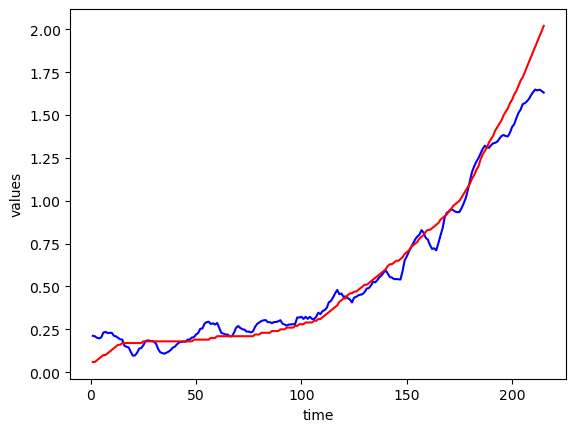

In [121]:
# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
# plt.title('Actual vs. Predicted Values')
plt.show() 

### 随机森林回归分析

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target_scaled)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions_scaled = best_model.predict(test_input)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 100}
MAE of the best model: 0.027775409706797045
MSE of the best model: 0.0033853510874392242


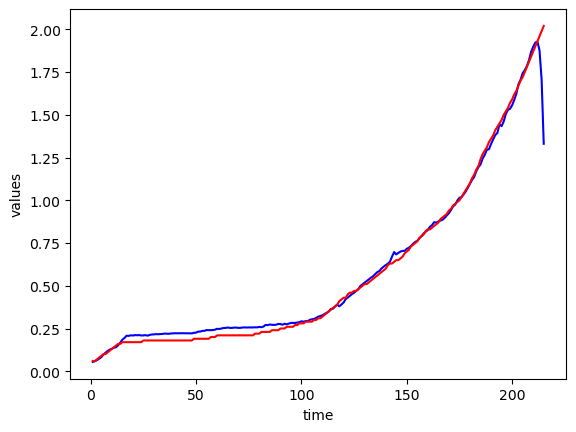

In [123]:
# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
# plt.title('Actual vs. Predicted Values')
plt.show() 

### 保存三个机器学习模型

In [43]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'dvs_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'dvs_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'dvs_rfr.joblib')

['dvs_rfr.joblib']

## 对TAGP进行分析

In [124]:
scaler_target = StandardScaler()
train_target = train['tagp'][6:].reset_index(drop=True).to_numpy()
train_target_scaled = scaler_target.fit_transform(train_target.reshape(-1,1)).ravel()
test_target = test['tagp'][6:].reset_index(drop=True).to_numpy()
test_target_scaled = scaler_target.transform(test_target.reshape(-1,1)).ravel()

### 多元回归分析

In [125]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target_scaled)

LinearRegression()

In [126]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [0.15578713 0.03542032 0.0151995  0.01522661 0.0176962 ]
Intercept: -2.320068183841004e-17


R-squared: -0.5263231739681071
MAE: 997.4455418379761
MSE: 1289086.9150859483


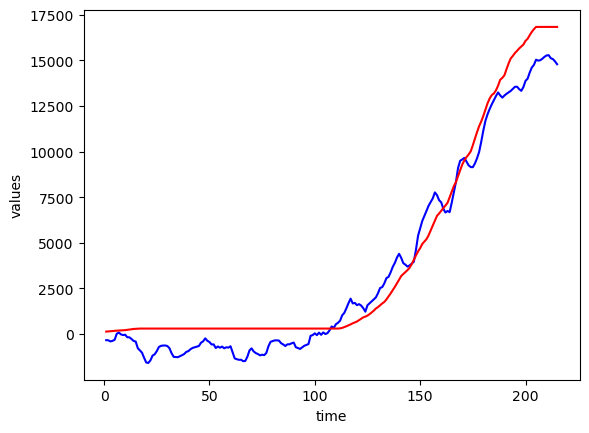

In [127]:
# 预测
predictions_scaled = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 反归一化
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

## 画图
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 支持向量回归分析

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target_scaled)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions_scaled = best_svr.predict(test_pca)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
MAE of the best model: 1175.48506405276
MSE of the best model: 1832402.479351291


### 随机森林回归分析

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target_scaled)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions_scaled = best_model.predict(test_input)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 300}
MAE of the best model: 127.94497444372584
MSE of the best model: 118306.46028379866


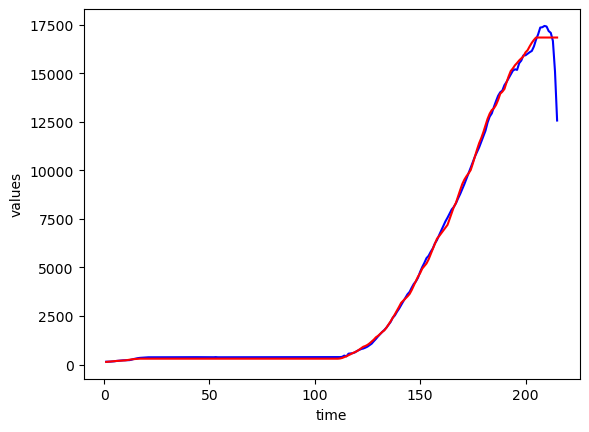

In [70]:
## 画图
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show()

### 保存三个机器学习模型

In [50]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'tagp_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'tagp_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'tagp_rfr.joblib')

['tagp_rfr.joblib']

## 对LAI进行分析

In [130]:
from sklearn.preprocessing import StandardScaler
scaler_target = StandardScaler()
train_target = train['lai'][6:].reset_index(drop=True).to_numpy()
train_target_scaled = scaler_target.fit_transform(train_target.reshape(-1,1)).ravel()
test_target = test['lai'][6:].reset_index(drop=True).to_numpy()
test_target_scaled = scaler_target.transform(test_target.reshape(-1,1)).ravel()

### 多元回归分析

In [131]:
# 进行多元回归分析
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(train_pca, train_target_scaled)

LinearRegression()

In [132]:
# 查看回归系数
print(f'Coefficients: {model.coef_}')

# 查看截距
print(f'Intercept: {model.intercept_}')

Coefficients: [ 0.13307549 -0.04268047 -0.21460801 -0.0321968  -0.05241778]
Intercept: -1.0925783555326872e-16


R-squared: -0.3362767304897749
MAE: 0.3141810498635097
MSE: 0.15458129432982454


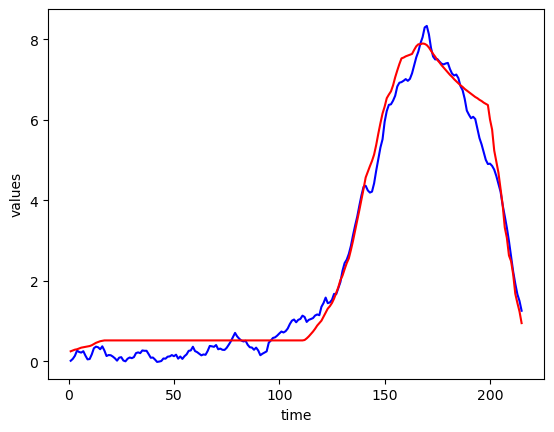

In [133]:
# 预测
predictions_scaled = model.predict(test_pca)

# 计算R平方
r_squared = model.score(test_pca, test_target)
print(f'R-squared: {r_squared}')

# 计算MAE MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()

mae = mean_absolute_error(test_target, predictions)

mse = mean_squared_error(test_target, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show() 

### 支持向量回归分析

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# 创建SVR模型实例
svr = SVR()

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']  # 仅在kernel为非线性时有效
}

# 为MAE创建评分函数
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 为MSE创建评分函数
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 创建GridSearchCV实例，这里我们使用MSE作为refit标准
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring={'mae': mae_scorer, 'mse': mse_scorer}, refit='mse')

# 执行网格搜索
grid_search.fit(train_pca, train_target_scaled)

# 输出最佳参数
print("Best parameters:", grid_search.best_params_)

# 使用最佳参数的模型
best_svr = grid_search.best_estimator_

# 评估最佳模型的MSE MAE
predictions_scaled = best_svr.predict(test_pca)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
MAE of the best model: 0.3256122657716241
MSE of the best model: 0.16557696040103514


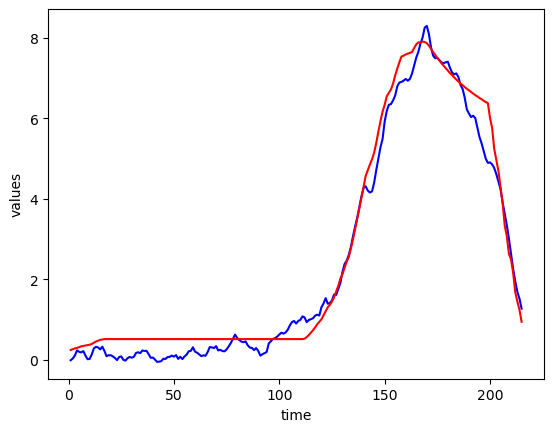

In [135]:
# 可视化
import matplotlib.pyplot as plt
n = len(predictions)
x = list(range(1, n+1))
plt.plot(x, predictions, color='blue')
plt.plot(x, test_target, color='red')
plt.xlabel('time')
plt.ylabel('values')
plt.show() 

### 随机森林回归分析

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
# 创建随机森林回归模型
rf = RandomForestRegressor(random_state=42, max_features='log2')

# 定义要遍历的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

# 使用make_scorer包装MAE和MSE为评分函数
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False)
}

# 创建GridSearchCV实例，设置评分标准为MAE
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring_functions, refit='MAE')

# 执行网格搜索
grid_search.fit(train_input, train_target_scaled)

# 输出最佳参数
print("Best parameters for MAE:", grid_search.best_params_)

# 评估最佳模型的MSE
best_model = grid_search.best_estimator_
predictions_scaled = best_model.predict(test_input)
predictions = scaler_target.inverse_transform(predictions_scaled.reshape(-1,1)).ravel()
mae_score = mean_absolute_error(test_target, predictions)
mse_score = mean_squared_error(test_target, predictions)
print("MAE of the best model:", mae_score)
print("MSE of the best model:", mse_score)

Best parameters for MAE: {'max_depth': 10, 'n_estimators': 100}
MAE of the best model: 0.08936657122064712
MSE of the best model: 0.011239936912399827


### 保存三个机器学习模型

In [57]:
from joblib import dump
# 保存多元线性回归模型
dump(model, 'lai_mlr.joblib')
# 保存支持向量回归模型
dump(best_svr, 'lai_svr.joblib')
# 保存随机森林回归模型
dump(best_model, 'lai_rfr.joblib')

['lai_rfr.joblib']